<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

<div class="alert alert-block alert-info">
    <h2 align="center">Importing the libraries</h2>
</div>

In [1]:
! pip install pycaret

     |████████████████████████████████| 288 kB 5.2 MB/s 
     |████████████████████████████████| 6.8 MB 37.6 MB/s 
     |████████████████████████████████| 1.3 MB 66.4 MB/s 
     |████████████████████████████████| 113 kB 66.8 MB/s 
     |████████████████████████████████| 167 kB 64.3 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 1.7 MB 54.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.9 MB 40.6 MB/s 
     |████████████████████████████████| 2.0 MB 62.3 MB/s 
     |████████████████████████████████| 261 kB 72.4 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 102 kB 8.9 MB/s 
     |████████████████████████████████| 675 kB 40.8 MB/s 
     |████████████████████████████████| 596 kB 63.1 MB/s 
     |██████████████████

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import pycaret
from pycaret.regression import *

<div class="alert alert-block alert-info">
    <h2 align="center">Load and Prepare Data</h2>
</div>

In [3]:
# For google colab
url = 'https://raw.githubusercontent.com/BKV15/AI_Utech/main/Machine%20Learning/Exercise_4/train.csv'

# For local jupyter notebook
path = 'train.csv'

data_train = pd.read_csv(url)
data_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
data_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<div class="alert alert-block alert-warning">
    <h4 align="center">Converting datetime into a usable format</h4>
</div>

In [6]:
data_train["date"] = data_train.datetime.apply(lambda x : x.split()[0])
data_train["hour"] = data_train.datetime.apply(lambda x : x.split()[1].split(":")[0])
data_train["weekday"] = data_train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
data_train["month"] = data_train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

<div class="alert alert-block alert-warning">
    <h4 align="center">Labeling categorical data</h4>
</div>

In [7]:
data_train["season"] = data_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
data_train["weather"] = data_train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

<div class="alert alert-block alert-info">
    <h2 align="center">EDA</h2>
</div>

<div class="alert alert-block alert-warning">
    <h4 align="center">Rental count has normal distribution across all seasons except spring</h4>
</div>

In [8]:
data_train.groupby('season')[['casual' , 'registered' ,'count']].sum()

,casual,registered,count
season,,,
Fall,142718,497944,640662
Spring,41605,270893,312498
Summer,129672,458610,588282
Winter,78140,465894,544034


<div class="alert alert-block alert-warning">
    <h4 align="center">Given that holidays are less frequent, rental count is also extremely lower on holidays</h4>
</div>

In [9]:
data_train.groupby('holiday')[['casual' , 'registered' ,'count']].sum()

,casual,registered,count
holiday,,,
0,376964,1650704,2027668
1,15171,42637,57808


<div class="alert alert-block alert-warning">
    <h4 align="center">Rental count is doubled in working day comparing to any other day (weekends and holidays)</h4>
</div>

In [10]:
data_train.groupby('workingday')[['casual' , 'registered' ,'count']].sum()

,casual,registered,count
workingday,,,
0,206037,448835,654872
1,186098,1244506,1430604


In [11]:
pd.crosstab(data_train['season'] , data_train['workingday'])

workingday,0,1
season,,
Fall,888,1845
Spring,858,1828
Summer,840,1893
Winter,888,1846


<div class="alert alert-block alert-warning">
    <h4 align="center">Weather condition has the most extreme effect on rental count</h4>
</div>

In [12]:
data_train.groupby('weather')[['casual' , 'registered' ,'count']].sum()

,casual,registered,count
weather,,,
Clear + Few clouds + Partly cloudy + Partly cloudy,289900,1186163,1476063
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",6,158,164
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",14983,87106,102089
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",87246,419914,507160


<div class="alert alert-block alert-warning">
    <h4 align="center">Considering that only spring has weather type 4 and the much lower temperature on weather type 4,
                       it make sense that spring has lower rental count</h4>
</div>

In [13]:
data_train.groupby('season')[['temp']].mean()

,temp
season,
Fall,28.789111
Spring,12.530491
Summer,22.823483
Winter,16.649239


In [14]:
data_train.groupby('weather')[['temp']].mean()

,temp
weather,
Clear + Few clouds + Partly cloudy + Partly cloudy,20.557122
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",8.200000
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",19.546356
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",19.614608


In [15]:
data_train.groupby(['season' , 'weather'])[['temp']].mean()

temp
season weather                                                      
Fall    Clear + Few clouds + Partly cloudy + Partly cl...  29.227264
        Light Snow, Light Rain + Thunderstorm + Scatte...  26.788040
        Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  28.048344
Spring  Clear + Few clouds + Partly cloudy + Partly cl...  12.539147
        Heavy Rain + Ice Pallets + Thunderstorm + Mist...   8.200000
        Light Snow, Light Rain + Thunderstorm + Scatte...  12.152322
        Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  12.626853
Summer  Clear + Few clouds + Partly cloudy + Partly cl...  23.180822
        Light Snow, Light Rain + Thunderstorm + Scatte...  21.001518
        Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  22.490932
Winter  Clear + Few clouds + Partly cloudy + Partly cl...  16.235711
        Light Snow, Light Rain + Thunderstorm + Scatte...  18.626756
        Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  16.970037

<div class="alert alert-block alert-warning">
    <h4 align="center">There is 3 to 4 degree diffrence between real temperature and the temperature felt across all seasons                          and weather types</h4>
</div>

In [16]:
data_train.groupby('weather')[['temp' , 'atemp', 'humidity' , 'windspeed']].mean()

,temp,atemp,humidity,windspeed
weather,,,,
Clear + Few clouds + Partly cloudy + Partly cloudy,20.557122,23.994126,56.716769,12.892542
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",8.200000,11.365000,86.000000,6.003200
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",19.546356,22.753091,81.341094,14.071248
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",19.614608,23.072414,69.100565,12.179905


In [17]:
data_train.groupby('season')[['temp' , 'atemp' , 'humidity' , 'windspeed']].mean()

,temp,atemp,humidity,windspeed
season,,,,
Fall,28.789111,32.540783,64.123674,11.508862
Spring,12.530491,15.228956,56.297841,14.636978
Summer,22.823483,26.647098,60.852909,13.405607
Winter,16.649239,20.059909,66.173738,11.678147


<div class="alert alert-block alert-info">
    <h2 align="center">Strorytelling - Visualization</h2>
</div>

<div class="alert alert-block alert-warning">
    <h4 align="center">Distribuation of rental count</h4>
</div>

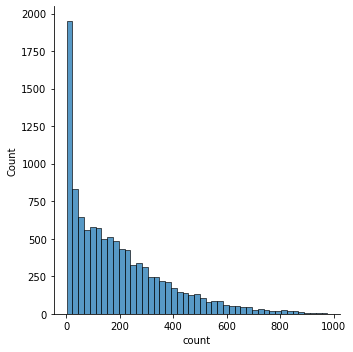

In [18]:
sns.displot(data=data_train , x='count')

<div class="alert alert-block alert-warning">
    <h4 align="center">January, Februray and March have the least average count due to bad weather</h4>
</div>

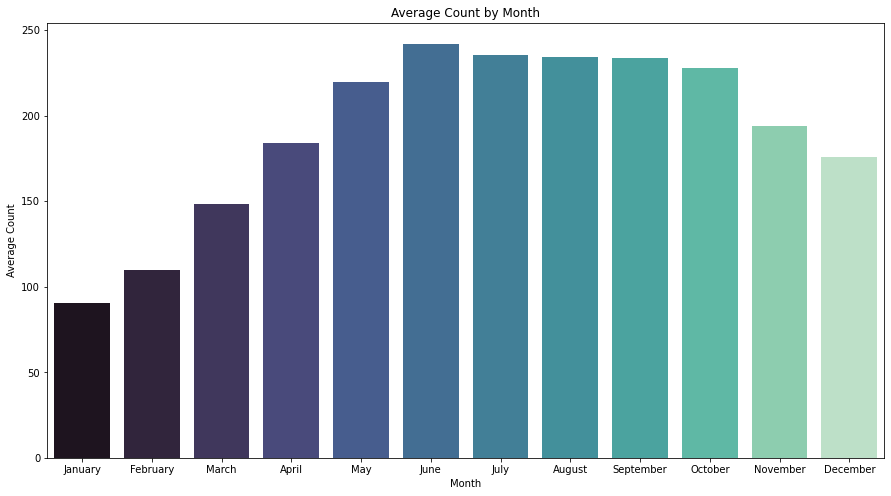

In [19]:
plt.figure(figsize=(15,8))
sort_order = sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
data = data_train.groupby('month')['count'].mean().reset_index()
sns.barplot(data=data , x='month' , y='count' , order=sort_order , palette='mako')
plt.title('Average Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.show()

<div class="alert alert-block alert-warning">
    <h4 align="center">Aside from weekends, average count increase in time range of 5 to 9 and 16 to 19 which corresponds to                          going can comming back from work. In weekends average count is higher at time range of 10 to 20</h4>
</div>

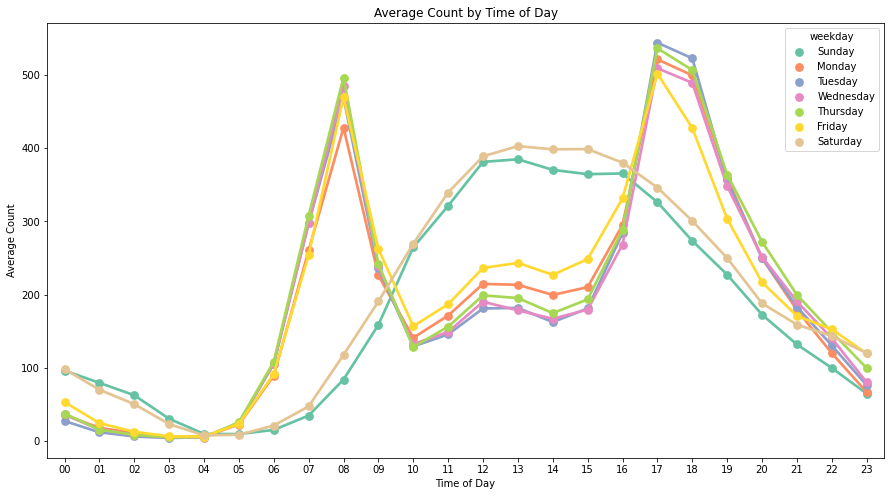

In [20]:
hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(15,8))
data = data_train.groupby(['hour' , 'weekday'])['count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='count' , hue='weekday' , hue_order=hue_order , join=True , palette='Set2')
plt.title('Average Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Count')
plt.show()

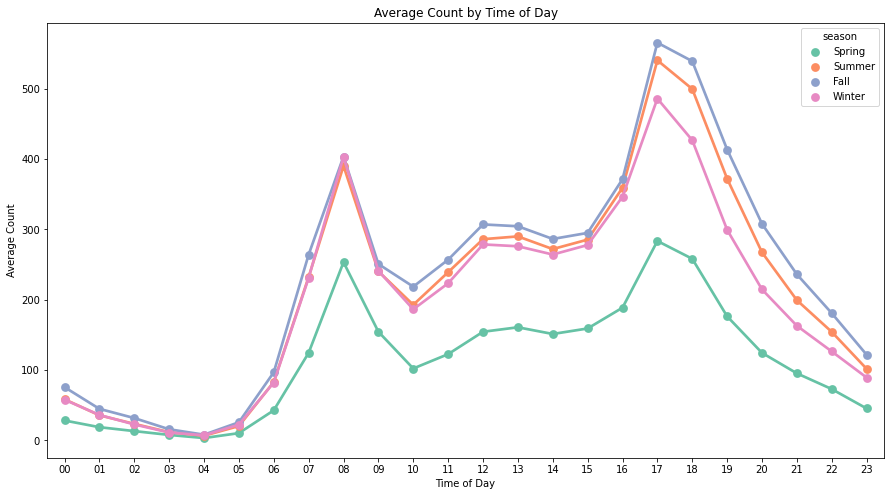

In [21]:
hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(15,8))
data = data_train.groupby(['hour' , 'season'])['count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='count' , hue='season' , hue_order=['Spring' , 'Summer' , 'Fall' , 'Winter'] , join=True , palette='Set2')
plt.title('Average Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Count')
plt.show()

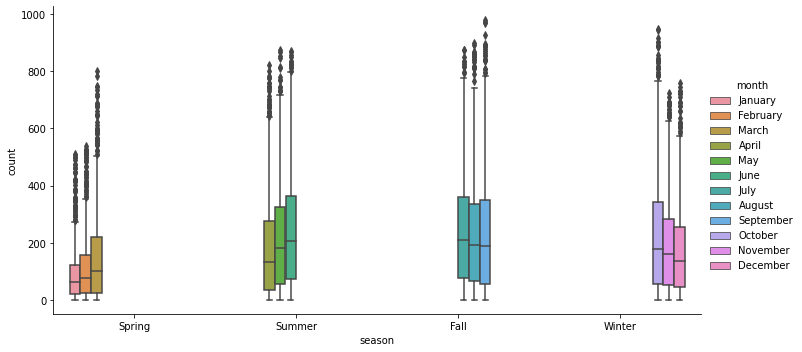

In [22]:
sns.catplot(x='season' , y='count' , hue='month' , kind='box' , data=data_train , aspect=2)
plt.show()

<div class="alert alert-block alert-info">
    <h2 align="center">Data Preprocessing</h2>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>Dropping useless features (Datetime , Casual , Registered)</li>
        <li>One hot encoding season, weather and weekday</li>
        <li>Label encoding month</li>
    </ul>
</div>

In [23]:
data_train = data_train.drop(['datetime' , 'date' , 'casual' , 'registered'] , axis=1)

In [24]:
data_train = pd.concat([data_train , pd.get_dummies(data_train['season'])] , axis=1)
data_train = pd.concat([data_train , pd.get_dummies(data_train['weather'])] , axis=1)
data_train = pd.concat([data_train , pd.get_dummies(data_train['weekday'])] , axis=1)
data_train = data_train.drop(['season' , 'weather' , 'weekday'] , axis=1)

In [25]:
data_train.replace({'month' : {"January" : 0,
                               "February": 1,
                               "March" : 2,
                               "April" : 3,
                               "May" : 4,
                               "June" : 5,
                               "July" : 6,
                               "August" : 7,
                               "September" : 8,
                               "October" : 9,
                               "November" : 10,
                               "December" : 11}} , inplace=True)

In [26]:
count = data_train[['count']]
data_train = data_train.drop('count' , axis=1)
data_train = pd.concat([data_train , count] , axis=1)

In [27]:
data_train.hour = data_train.hour.astype('int64')

<div class="alert alert-block alert-warning">
    <ul>
        <li>Understanding features relation to target</li>
    </ul>
</div>

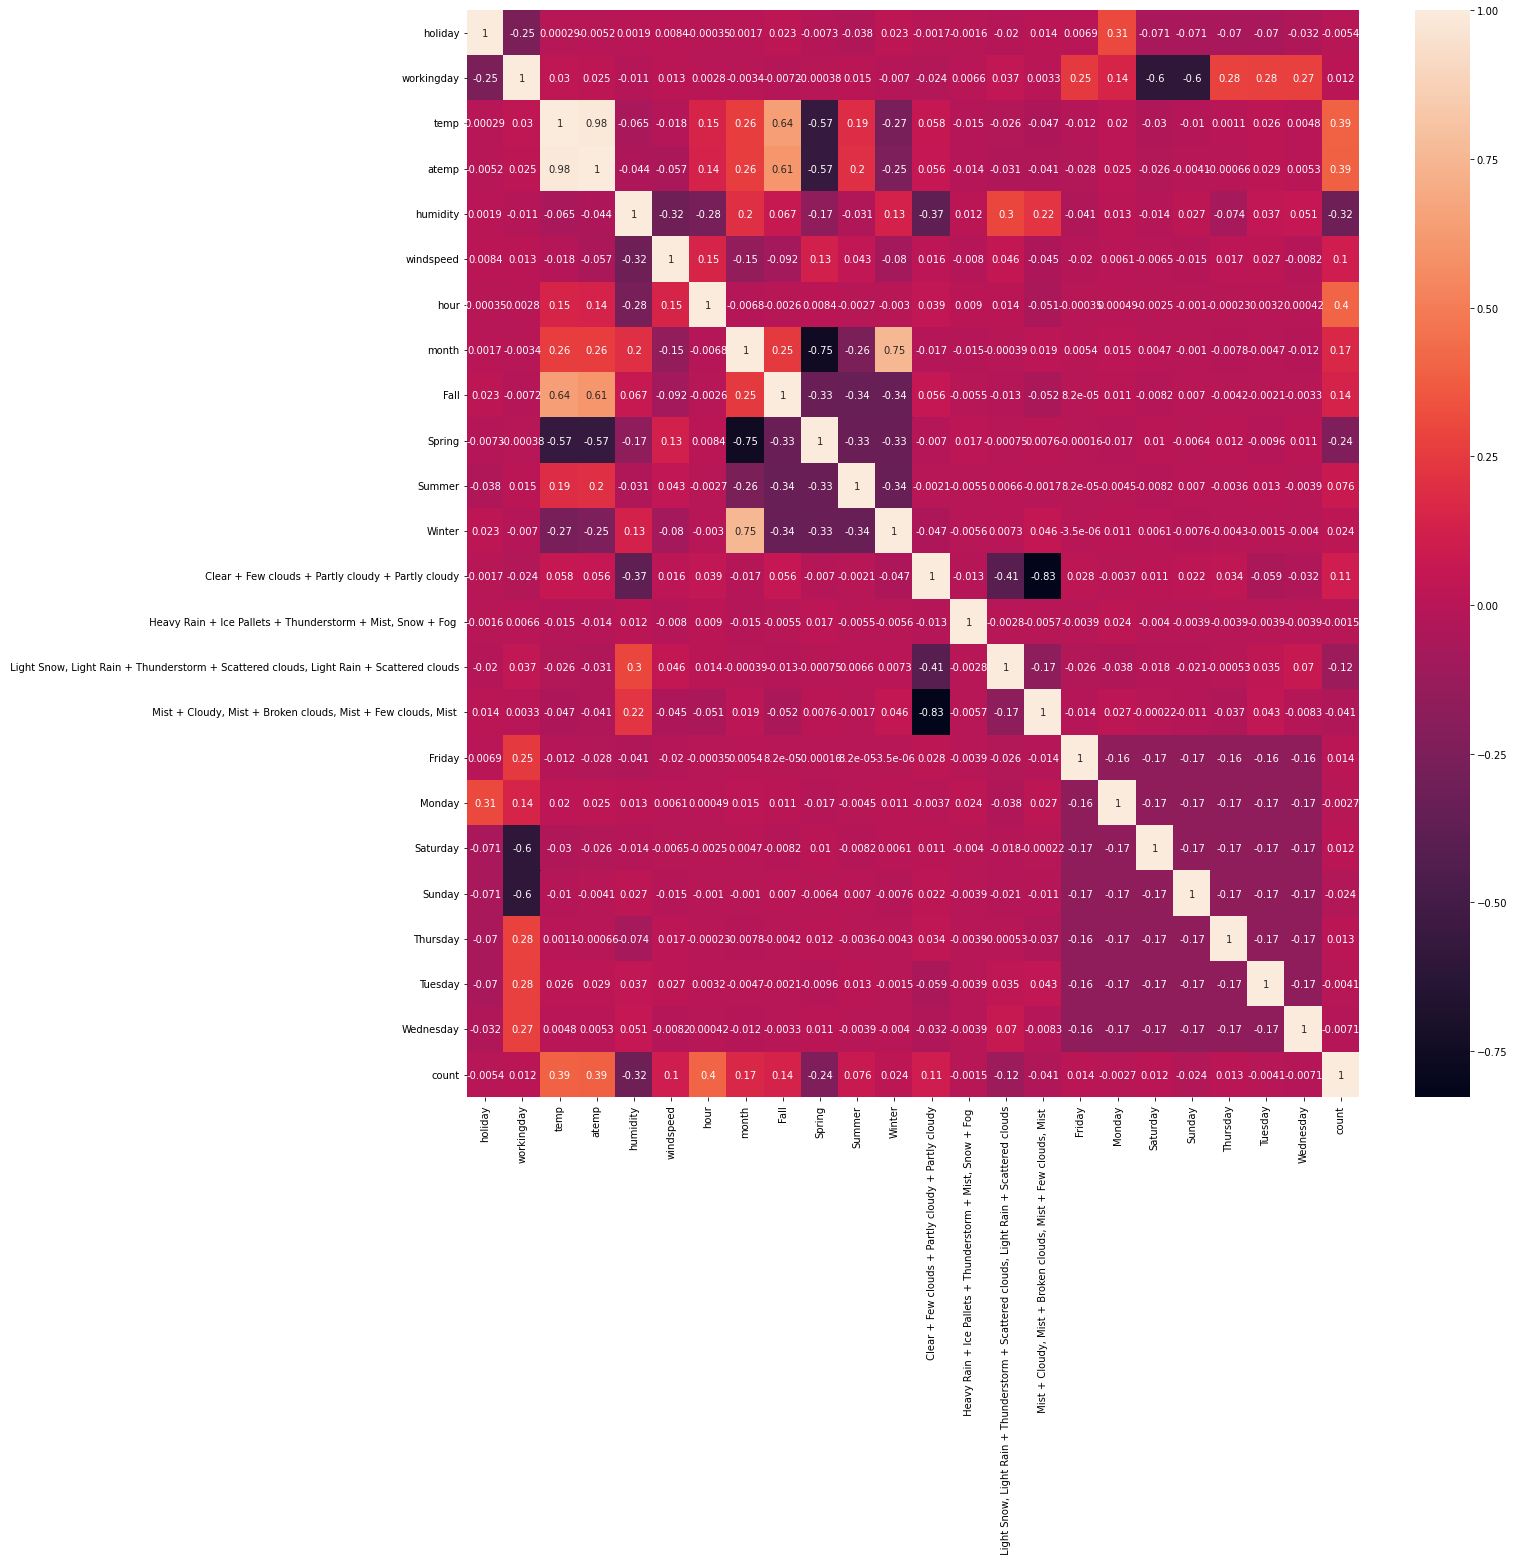

In [28]:
plt.figure(figsize=(20 , 20))
sns.heatmap(data_train.corr() , annot=True)

<div class="alert alert-block alert-warning">
    <ul>
        <li>Splitting data into train and test</li>
        <li>Scaling features that are not categorical</li>
    </ul>
</div>

In [29]:
x = data_train.iloc[: , :-1].values
y = data_train.iloc[:  , -1].values
print(x.shape , y.shape)

(10886, 23) (10886,)


In [30]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(8164, 23) (8164,)
(2722, 23) (2722,)


In [31]:
sc = StandardScaler()
x_train[: , 2:6] = sc.fit_transform(x_train[: , 2:6])
x_test[: , 2:6] = sc.transform(x_test[: , 2:6])

<div class="alert alert-block alert-warning">
    <ul>
        <li>Defining scores used in models evaluation</li>
    </ul>
</div>

In [32]:
scoring = ['neg_mean_absolute_error' , 'neg_mean_squared_error' , 'neg_root_mean_squared_error' , 'r2']

<div class="alert alert-block alert-info">
    <h2 align="center">Train your model (Regression)</h2>
</div>

<div class="alert alert-block alert-danger">
    <h3 align="center">Simple Linear Regression for all features</h3>
</div>

Metrics for holiday
R^2 : -0.0028808309550805156
RMSE : 186.6548779447962
------------------------------------
Metrics for workingday
R^2 : -0.0033747916235669084
RMSE : 186.70083994502974
------------------------------------
Metrics for temp
R^2 : 0.15528370722885654
RMSE : 171.30502963235335
------------------------------------
Metrics for atemp
R^2 : 0.14958803036487756
RMSE : 171.8815894262517
------------------------------------
Metrics for humidity
R^2 : 0.0893953018909247
RMSE : 177.86054642260189
------------------------------------
Metrics for windspeed
R^2 : 0.006635436138238804
RMSE : 185.76718948491467
------------------------------------
Metrics for hour
R^2 : 0.14870977049935064
RMSE : 171.97032156556853
------------------------------------
Metrics for month
R^2 : 0.026987522339780634
RMSE : 183.85433896801865
------------------------------------
Metrics for Fall
R^2 : 0.01819480737579504
RMSE : 184.6831788611715
------------------------------------
Metrics for Spring
R^2

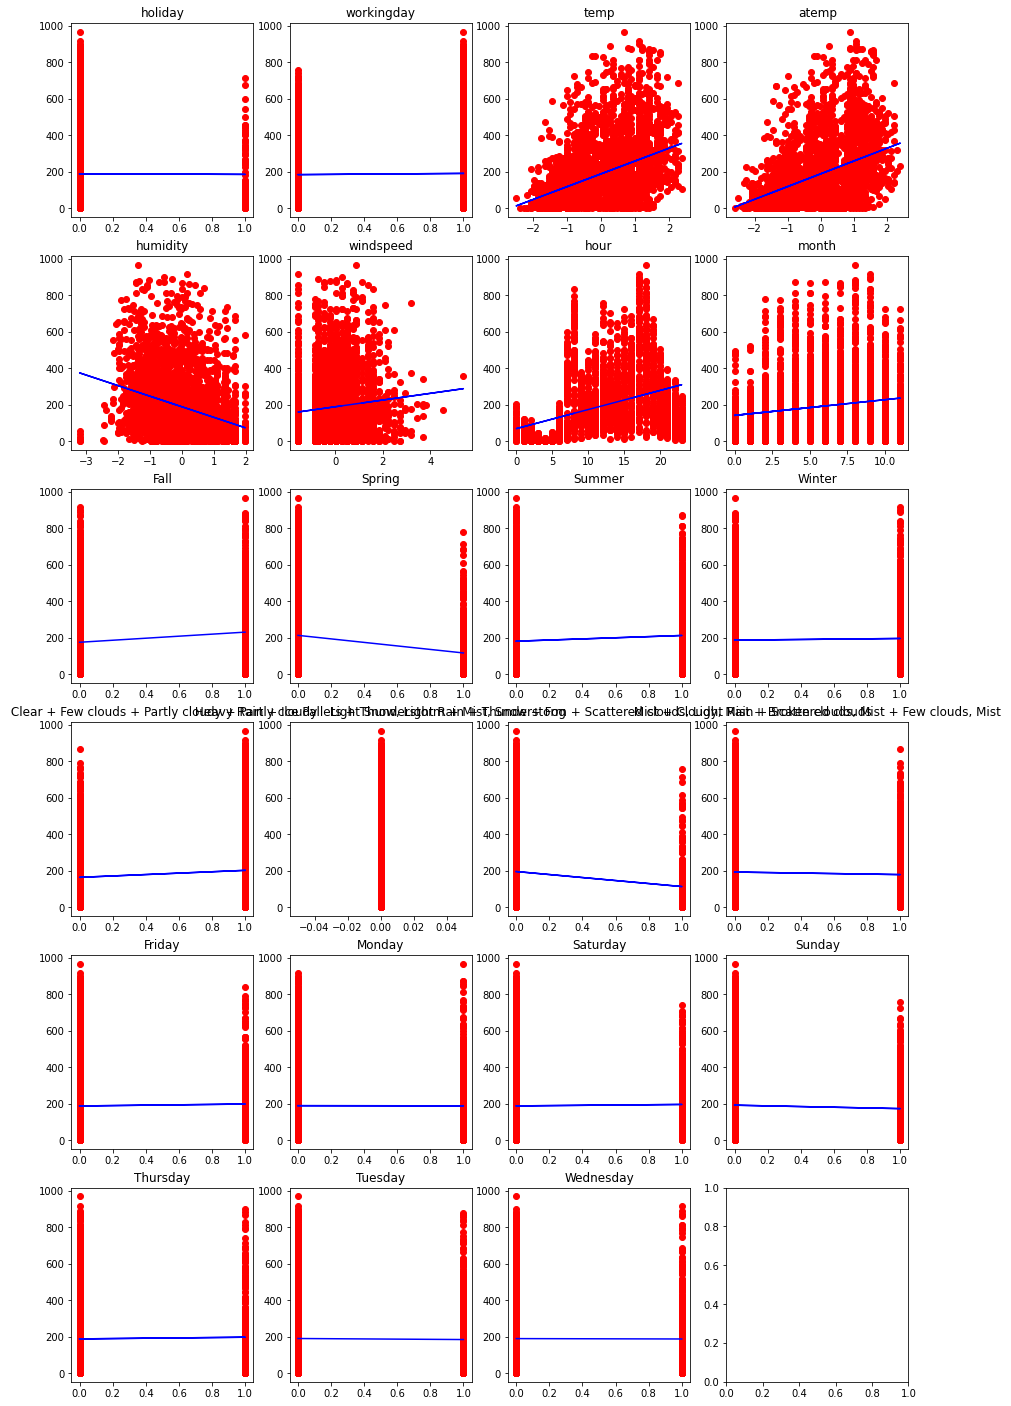

In [33]:
fig,ax = plt.subplots(6,4 , figsize=(15,25))
counter = 0

for i in range(0 , 6):
    for j in range(0 , 4):
        
        if counter == 23 :
            break
        
        # Training model
        regressor = LinearRegression()
        regressor.fit(x_train[: , counter].reshape(-1,1) , y_train)
        
        # Predicting result with test
        y_pred = regressor.predict(x_test[: , counter].reshape(-1,1))
        
        print(f'Metrics for {data_train.columns[counter]}')
        print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')
        print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
        print('------------------------------------')
        
        ax[i,j].scatter(x_test[: , counter].reshape(-1,1) , y_test , color='red')
        ax[i,j].plot(x_test[: , counter].reshape(-1,1) , y_pred , color='blue')
        ax[i,j].set_title(data_train.columns[counter])
        counter +=1
        
plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">Multiple Linear Regression</h3>
</div>

In [34]:
multiple_regressor = LinearRegression()
scores = cross_validate(estimator=multiple_regressor , X=x_train , y=y_train , cv=10 ,scoring=scoring)
print(f"MAE : {scores['test_neg_mean_absolute_error'].mean()}")
print(f"MSE : {scores['test_neg_mean_squared_error'].mean()}")
print(f"RMSE : {scores['test_neg_root_mean_squared_error'].mean()}")
print(f"R^2 : {scores['test_r2'].mean()}")

MAE : -106.21926320525279
MSE : -20905.402936117258
RMSE : -144.5181630895438
R^2 : 0.348474531309077


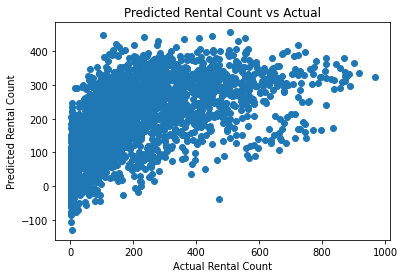

In [35]:
multiple_regressor.fit(x_train , y_train)
y_pred = multiple_regressor.predict(x_test)
plt.scatter(y_test , y_pred)
plt.title('Predicted Rental Count vs Actual')
plt.xlabel('Actual Rental Count')
plt.ylabel('Predicted Rental Count')
plt.show()

In [36]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 112.20853143517567
MSE : 23060.266304362845
RMSE : 151.85607101582355
R^2 : 0.33620349642998537


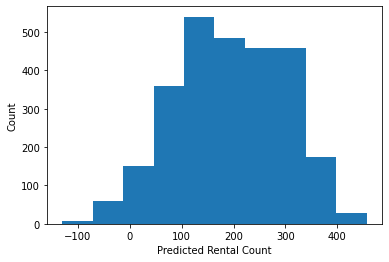

In [37]:
plt.hist(y_pred)
plt.xlabel('Predicted Rental Count')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">Polynomial Linear Regression (Degree=2)</h3>
</div>

In [38]:
# Creating polynomial regressor
poly_features = PolynomialFeatures(degree=2)
x_train_quadratic = poly_features.fit_transform(x_train)
quadratic_regressor = LinearRegression()

# Cross validation for polynomial regression
scores = cross_validate(estimator=quadratic_regressor , X=x_train_quadratic , y=y_train , cv=10 ,scoring=scoring)
print(f"MAE : {scores['test_neg_mean_absolute_error'].mean()}")
print(f"MSE : {scores['test_neg_mean_squared_error'].mean()}")
print(f"RMSE : {scores['test_neg_root_mean_squared_error'].mean()}")
print(f"R^2 : {scores['test_r2'].mean()}")

MAE : -13355011.904870477
MSE : -1.455367199963952e+18
RMSE : -381492867.6522169
R^2 : -47115589400935.89


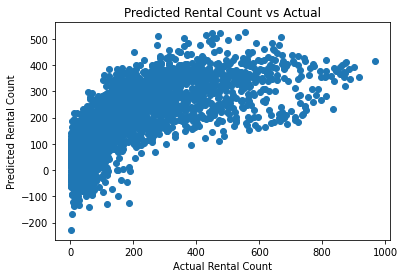

In [39]:
quadratic_regressor.fit(x_train_quadratic , y_train)
y_pred = quadratic_regressor.predict(poly_features.fit_transform(x_test))
plt.scatter(y_test , y_pred)
plt.title('Predicted Rental Count vs Actual')
plt.xlabel('Actual Rental Count')
plt.ylabel('Predicted Rental Count')
plt.show()

In [40]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 98.47898131004733
MSE : 17748.590657561366
RMSE : 133.22383667182598
R^2 : 0.48910163194621514


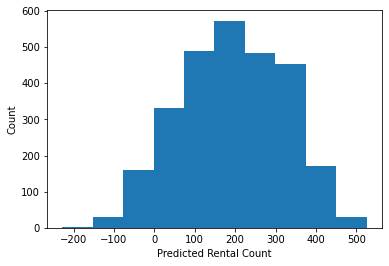

In [41]:
plt.hist(y_pred)
plt.xlabel('Predicted Rental Count')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">K Nearest Neighbor</h3>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>K = 10 is the best hyper parameter in K Nearest Neighbor</li>
    </ul>
</div>

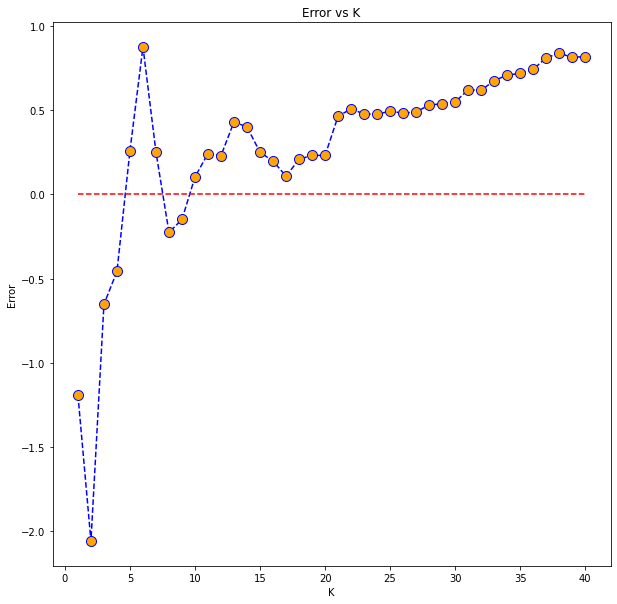

In [42]:
error = []

for i in range (1,41):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train , y_train)
    y_pred_i = knn.predict(x_test)
    error.append(np.mean(y_pred_i) - np.mean(y_test))
    
plt.figure(figsize=(10,10))
plt.plot(range(1,41) , error , color='blue' , marker='o' , linestyle='dashed' , markersize=10 , markerfacecolor='orange')
plt.plot(range(1,41) , np.zeros((40,)) , color='red' , linestyle='dashed')
plt.title('Error vs K')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [43]:
knn = KNeighborsRegressor()

parameters = [{'n_neighbors' : [3,4,5,6,7,8,9,10,11]}]
grid_search = GridSearchCV(estimator=knn , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Scores : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

Best Scores : 0.8146698424450763
Best Parameter : {'n_neighbors': 7}


In [44]:
knn = KNeighborsRegressor(n_neighbors=7)

scores = cross_validate(estimator=knn , X=x_train , y=y_train , cv=10 ,scoring=scoring)
print(f"MAE : {scores['test_neg_mean_absolute_error'].mean()}")
print(f"MSE : {scores['test_neg_mean_squared_error'].mean()}")
print(f"RMSE : {scores['test_neg_root_mean_squared_error'].mean()}")
print(f"R^2 : {scores['test_r2'].mean()}")

MAE : -50.345431100836905
MSE : -5935.881980451299
RMSE : -77.02091795160717
R^2 : 0.8146698424450763


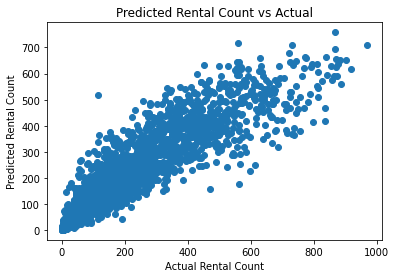

In [45]:
knn.fit(x_train , y_train)
y_pred = knn.predict(x_test)
plt.scatter(y_test , y_pred)
plt.title('Predicted Rental Count vs Actual')
plt.xlabel('Actual Rental Count')
plt.ylabel('Predicted Rental Count')
plt.show()

In [46]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 51.02267240474441
MSE : 6070.785511853529
RMSE : 77.91524569590683
R^2 : 0.8252506652132864


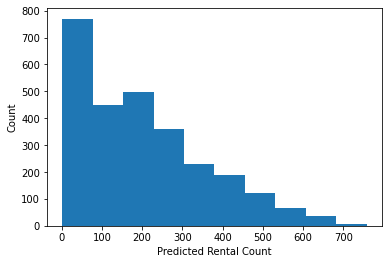

In [47]:
plt.hist(y_pred)
plt.xlabel('Predicted Rental Count')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">Decision Tree Regression</h3>
</div>

In [48]:
dt_regressor = DecisionTreeRegressor()

scores = cross_validate(estimator=dt_regressor , X=x_train , y=y_train , cv=10 ,scoring=scoring)
print(f"MAE : {scores['test_neg_mean_absolute_error'].mean()}")
print(f"MSE : {scores['test_neg_mean_squared_error'].mean()}")
print(f"RMSE : {scores['test_neg_root_mean_squared_error'].mean()}")
print(f"R^2 : {scores['test_r2'].mean()}")

MAE : -57.57476607687138
MSE : -8743.410818400953
RMSE : -93.38649579859847
R^2 : 0.7266065782470974


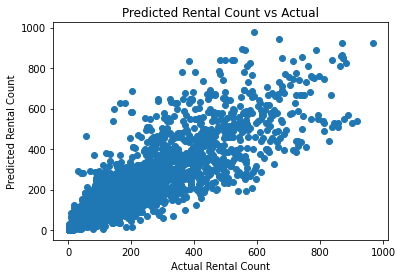

In [49]:
dt_regressor.fit(x_train , y_train)
y_pred = dt_regressor.predict(x_test)
plt.scatter(y_test , y_pred)
plt.title('Predicted Rental Count vs Actual')
plt.xlabel('Actual Rental Count')
plt.ylabel('Predicted Rental Count')
plt.show()

In [50]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 58.326230712711244
MSE : 8773.351947097723
RMSE : 93.66617290728666
R^2 : 0.7474565007095846


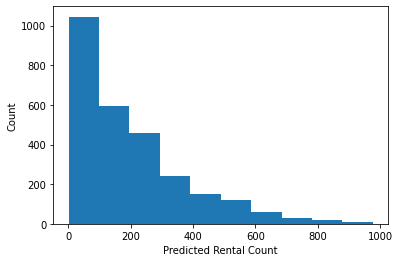

In [51]:
plt.hist(y_pred)
plt.xlabel('Predicted Rental Count')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">Random Forest Regression</h3>
</div>

In [52]:
rf_regressor = RandomForestRegressor()

parameters = [{'n_estimators' : [100,200,300]}]
grid_search = GridSearchCV(estimator=rf_regressor , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Score : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Score : 0.8588466869197411
Best Parameter : {'n_estimators': 300}


In [53]:
rf_regressor = RandomForestRegressor(n_estimators=300)

scores = cross_validate(estimator=rf_regressor , X=x_train , y=y_train , cv=10 , scoring=scoring)
print(f"MAE : {scores['test_neg_mean_absolute_error'].mean()}")
print(f"MSE : {scores['test_neg_mean_squared_error'].mean()}")
print(f"RMSE : {scores['test_neg_root_mean_squared_error'].mean()}")
print(f"R^2 : {scores['test_r2'].mean()}")

MAE : -44.293082633485355
MSE : -4515.965913622048
RMSE : -67.16743541107542
R^2 : 0.8587956356949361


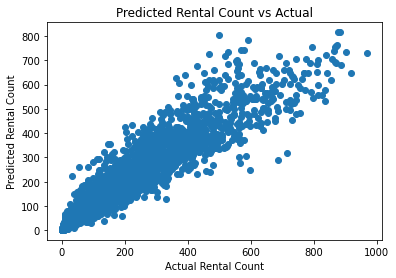

In [54]:
rf_regressor.fit(x_train , y_train)
y_pred = rf_regressor.predict(x_test)
plt.scatter(y_test , y_pred)
plt.title('Predicted Rental Count vs Actual')
plt.xlabel('Actual Rental Count')
plt.ylabel('Predicted Rental Count')
plt.show()

In [55]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 43.917941796998
MSE : 4360.9732434224115
RMSE : 66.03766533897463
R^2 : 0.8744681109515848


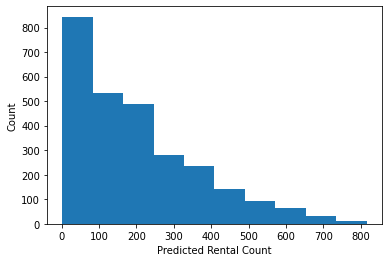

In [56]:
plt.hist(y_pred)
plt.xlabel('Predicted Rental Count')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">XGBoost Regression</h3>
</div>

In [57]:
xgb_reg = xgb.XGBRegressor(
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
)

parameters = [{'n_estimators' : [100,200,300] , 'learning_rate' : [0.06,0.08,0.1] , 'gamma': [0.0,0.1, 0.2,]}]
grid_search = GridSearchCV(estimator=xgb_reg , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Score : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

[15:37:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score : 0.8887684082759346
Best Parameter : {'gamma': 0.0, 'learning_rate': 0.1, 'n_estimators': 300}


In [58]:
xgb_reg = xgb.XGBRegressor(
    n_estimators = 300,
    learning_rate = 0.1,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)

scores = cross_validate(estimator=xgb_reg , X=x_train , y=y_train , cv=10 , scoring=scoring)
print(f"MAE : {scores['test_neg_mean_absolute_error'].mean()}")
print(f"MSE : {scores['test_neg_mean_squared_error'].mean()}")
print(f"RMSE : {scores['test_neg_root_mean_squared_error'].mean()}")
print(f"R^2 : {scores['test_r2'].mean()}")

[15:37:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[15:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


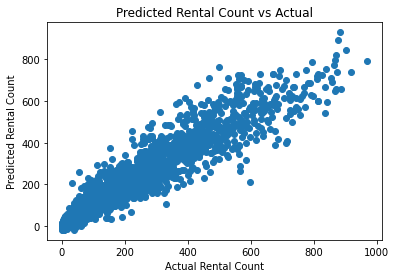

In [59]:
xgb_reg.fit(x_train , y_train)
y_pred = xgb_reg.predict(x_test)
plt.scatter(y_test , y_pred)
plt.title('Predicted Rental Count vs Actual')
plt.xlabel('Actual Rental Count')
plt.ylabel('Predicted Rental Count')
plt.show()

In [60]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 39.716726376850936
MSE : 3625.601975194165
RMSE : 60.21297181832304
R^2 : 0.8956359877762946


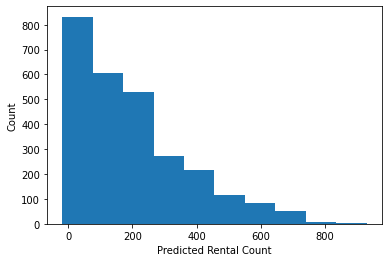

In [61]:
plt.hist(y_pred)
plt.xlabel('Predicted Rental Count')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">Support Vector Regression</h3>
</div>

In [62]:
svr_reg = SVR()

parameters = [{'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}]
grid_search = GridSearchCV(estimator=svr_reg , param_grid=parameters , scoring='r2' , cv=10 , n_jobs=-1)
grid_search.fit(x_train , y_train)

print(f'Best Score : {grid_search.best_score_}')
print(f'Best Parameter : {grid_search.best_params_}')

Best Score : 0.3661571275087075
Best Parameter : {'kernel': 'rbf'}


In [63]:
svr_reg = SVR(kernel='rbf')

scores = cross_validate(estimator=svr_reg , X=x_train , y=y_train , cv=10 , scoring=scoring)
print(f"MAE : {scores['test_neg_mean_absolute_error'].mean()}")
print(f"MSE : {scores['test_neg_mean_squared_error'].mean()}")
print(f"RMSE : {scores['test_neg_root_mean_squared_error'].mean()}")
print(f"R^2 : {scores['test_r2'].mean()}")

MAE : -91.70343330695991
MSE : -20360.521419704313
RMSE : -142.58396661159983
R^2 : 0.3661571275087075


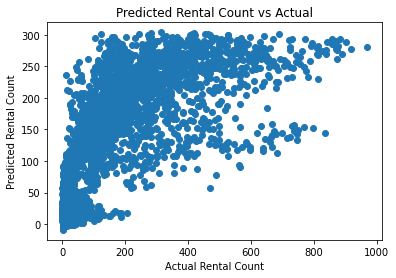

In [64]:
svr_reg.fit(x_train , y_train)
y_pred = svr_reg.predict(x_test)
plt.scatter(y_test , y_pred)
plt.title('Predicted Rental Count vs Actual')
plt.xlabel('Actual Rental Count')
plt.ylabel('Predicted Rental Count')
plt.show()

In [65]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 97.01055575917431
MSE : 22575.617634027505
RMSE : 150.25184735645516
R^2 : 0.3501542500154975


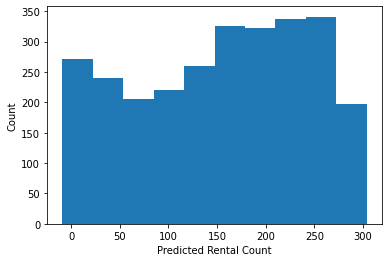

In [66]:
plt.hist(y_pred)
plt.xlabel('Predicted Rental Count')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-info">
    <h1 align="center">Test Result</h1>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>Importing test data</li>
        <li>Converting to orginal data form</li>
        <li>Encoding and scaling it for training</li>
        <li>Evaluating whether the predicted data is correct</li>
    </ul>
</div>

In [67]:
# For google colab
url = 'https://raw.githubusercontent.com/BKV15/AI_Utech/main/Machine%20Learning/Exercise_4/test.csv'

# For local jupyter notebook
path = 'test.csv'

data_test = pd.read_csv(url)

# converting datetime into a usable format
data_test["date"] = data_test.datetime.apply(lambda x : x.split()[0])
data_test["hour"] = data_test.datetime.apply(lambda x : x.split()[1].split(":")[0])
data_test["weekday"] = data_test.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
data_test["month"] = data_test.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

# converting categorical data for later encoding
data_test["season"] = data_test.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
data_test["weather"] = data_test.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })


data_test_modeling = data_test.copy()

# droping useless features
data_test_modeling = data_test_modeling.drop(['datetime' , 'date'] , axis=1)

# encoding categorical data and dropping the original column
data_test_modeling = pd.concat([data_test_modeling , pd.get_dummies(data_test_modeling['season'])] , axis=1)
data_test_modeling = pd.concat([data_test_modeling , pd.get_dummies(data_test_modeling['weather'])] , axis=1)
data_test_modeling = pd.concat([data_test_modeling , pd.get_dummies(data_test_modeling['weekday'])] , axis=1)
data_test_modeling = data_test_modeling.drop(['season' , 'weather' , 'weekday'] , axis=1)
data_test_modeling.replace({'month' : {"January" : 0,
                               "February": 1,
                               "March" : 2,
                               "April" : 3,
                               "May" : 4,
                               "June" : 5,
                               "July" : 6,
                               "August" : 7,
                               "September" : 8,
                               "October" : 9,
                               "November" : 10,
                               "December" : 11}} , inplace=True)

# changing the type of hour column
data_test_modeling.hour = data_train.hour.astype('int64')
data_test_modeling.sample()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,month,Fall,Spring,Summer,Winter,Clear + Few clouds + Partly cloudy + Partly cloudy,"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1793,0,1,39.36,43.18,30,19.9995,15,6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [68]:
# creating x test for prediction
x_data_test = data_test_modeling.values

# Scaling x
x_data_test[: , 2:6] = sc.transform(x_data_test[: , 2:6])

<div class="alert alert-block alert-danger">
    <h3 align="center">New Data - Multiple Regression Prediction</h3>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>Rental distribuation isn't normal</li>
        <li>Model predicted negative values which should be immpossible</li>
        <li>Average rental count across month is close to actuall data</li>
        <li>Average rental count across time of day per weekday and season is also close to actuall data but has variation</li>
    </ul>
</div>

In [69]:
y_data_pred = multiple_regressor.predict(x_data_test) 

In [70]:
predicted = pd.DataFrame(y_data_pred.reshape(-1,1) , columns=['Predicted Count'])
mr_data = pd.concat([data_test , predicted] , axis=1)
mr_data.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Predicted Count
3210,2011-12-31 11:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,17.22,21.21,71,11.0014,2011-12-31,11,Saturday,December,278.088271


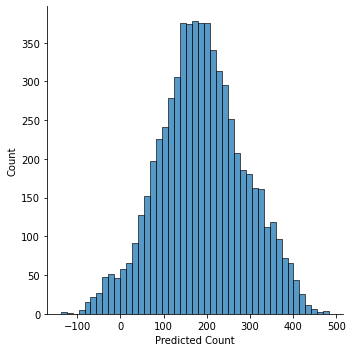

In [71]:
sns.displot(data=mr_data , x='Predicted Count')

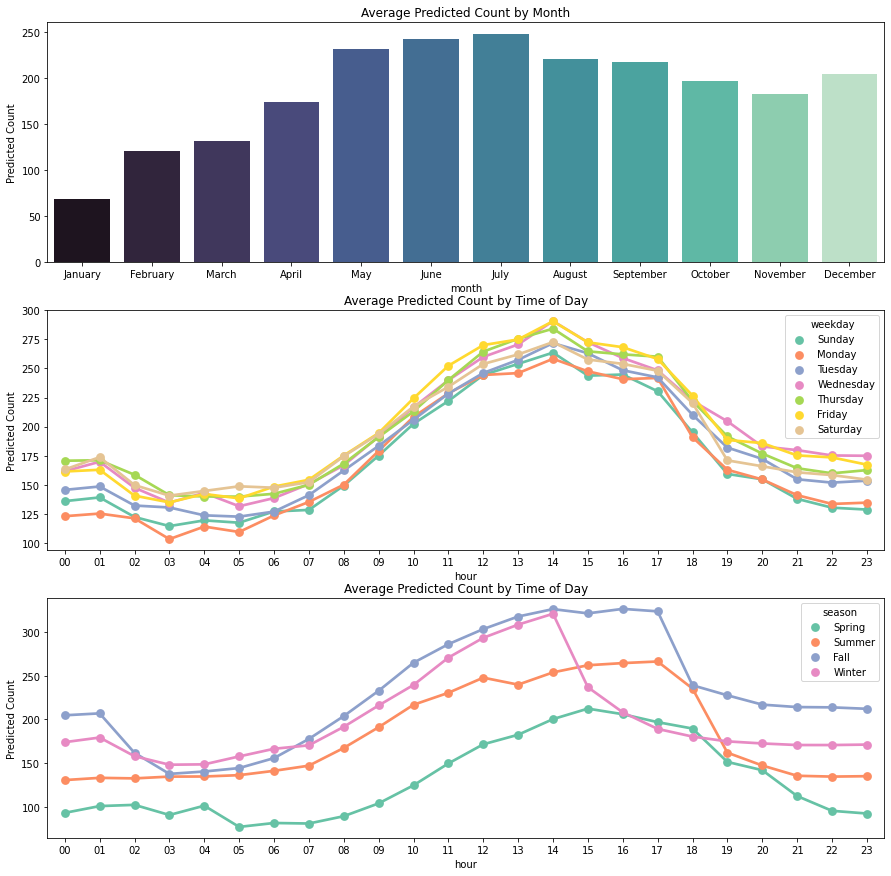

<Figure size 1080x576 with 0 Axes>

In [72]:
fig,ax = plt.subplots(3, figsize=(15,15))

sort_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
data = mr_data.groupby('month')['Predicted Count'].mean().reset_index()
sns.barplot(data=data , x='month' , y='Predicted Count', ax=ax[0] , order=sort_order , palette='mako')
ax[0].set_title('Average Predicted Count by Month')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
data = mr_data.groupby(['hour' , 'weekday'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[1] , hue='weekday' , hue_order=hue_order , join=True , palette='Set2')
ax[1].set_title('Average Predicted Count by Time of Day')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(15,8))
data = mr_data.groupby(['hour' , 'season'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[2] , hue='season' , hue_order=['Spring' , 'Summer' , 'Fall' , 'Winter'] , join=True , palette='Set2')
ax[2].set_title('Average Predicted Count by Time of Day')


plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">New Data - Polynomial Regression Prediction</h3>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>Rental distribuation isn't normal</li>
        <li>Model predicted negative values which should be immpossible</li>
        <li>Polynomial model is the worst model and predicted some crazy values</li>
        <li>Average rental count across time of day per weekday and season and across month is all over the place</li>
    </ul>
</div>

In [73]:
y_data_pred = quadratic_regressor.predict(poly_features.fit_transform(x_data_test))
predicted = pd.DataFrame(y_data_pred.reshape(-1,1) , columns=['Predicted Count'])
quadratic_data = pd.concat([data_test , predicted] , axis=1)
quadratic_data.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Predicted Count
6489,2012-12-31 20:00:00,Spring,0,1,"Mist + Cloudy, Mist + Broken clouds, Mist + F...",10.66,12.88,60,11.0014,2012-12-31,20,Monday,December,-101.76176


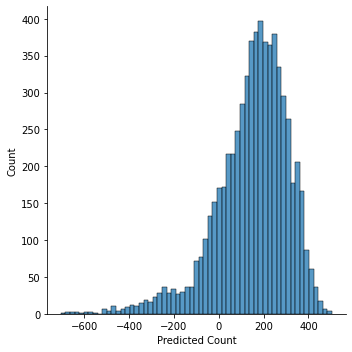

In [74]:
sns.displot(data=quadratic_data , x='Predicted Count')

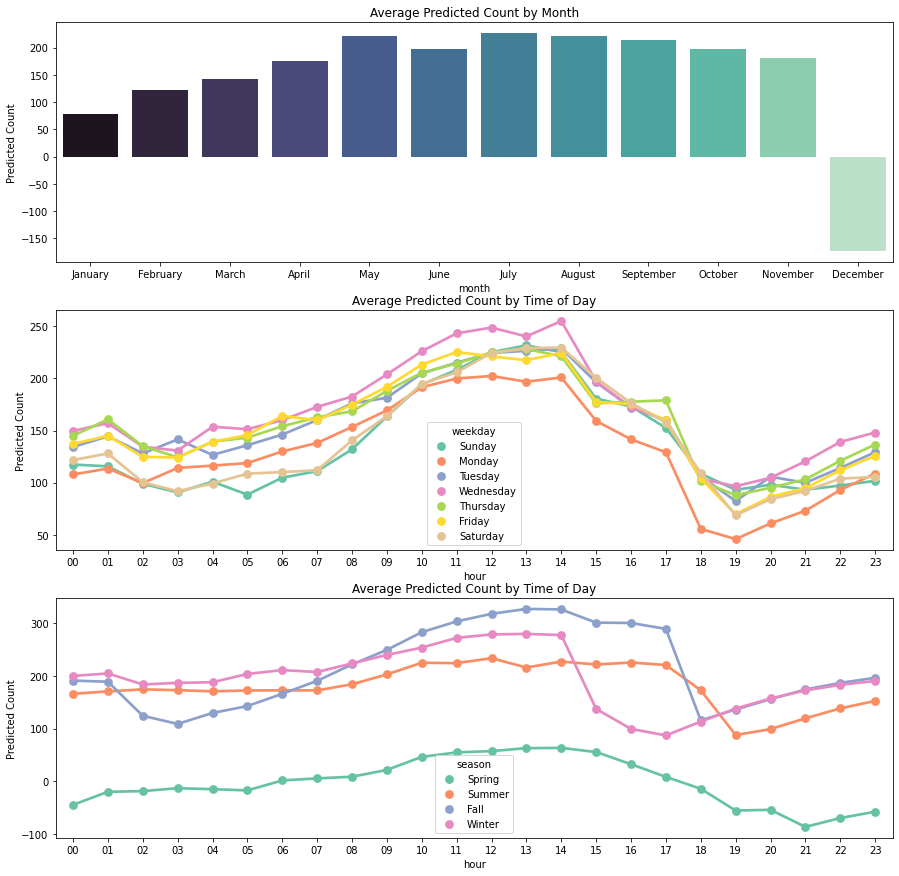

<Figure size 1080x576 with 0 Axes>

In [75]:
fig,ax = plt.subplots(3, figsize=(15,15))

sort_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
data = quadratic_data.groupby('month')['Predicted Count'].mean().reset_index()
sns.barplot(data=data , x='month' , y='Predicted Count', ax=ax[0] , order=sort_order , palette='mako')
ax[0].set_title('Average Predicted Count by Month')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
data = quadratic_data.groupby(['hour' , 'weekday'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[1] , hue='weekday' , hue_order=hue_order , join=True , palette='Set2')
ax[1].set_title('Average Predicted Count by Time of Day')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(15,8))
data = quadratic_data.groupby(['hour' , 'season'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[2] , hue='season' , hue_order=['Spring' , 'Summer' , 'Fall' , 'Winter'] , join=True , palette='Set2')
ax[2].set_title('Average Predicted Count by Time of Day')


plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">New Data - K Nearest Neighbour Regression Prediction</h3>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>Rental distribuation is normal</li>
        <li>Model didn't predicted negative values which is a good sign!</li>
        <li>Average rental count across time of day per weekday and season and across month closely resemble actual data</li>
    </ul>
</div>

In [76]:
y_data_pred = knn.predict(x_data_test)
predicted = pd.DataFrame(y_data_pred.reshape(-1,1) , columns=['Predicted Count'])
knn_data = pd.concat([data_test , predicted] , axis=1)
knn_data.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Predicted Count
3240,2012-01-20 17:00:00,Spring,0,1,"Mist + Cloudy, Mist + Broken clouds, Mist + F...",9.02,12.88,32,6.0032,2012-01-20,17,Friday,January,39.714286


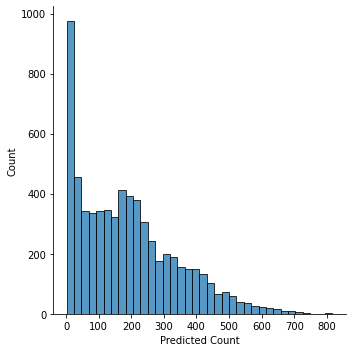

In [77]:
sns.displot(data=knn_data , x='Predicted Count')

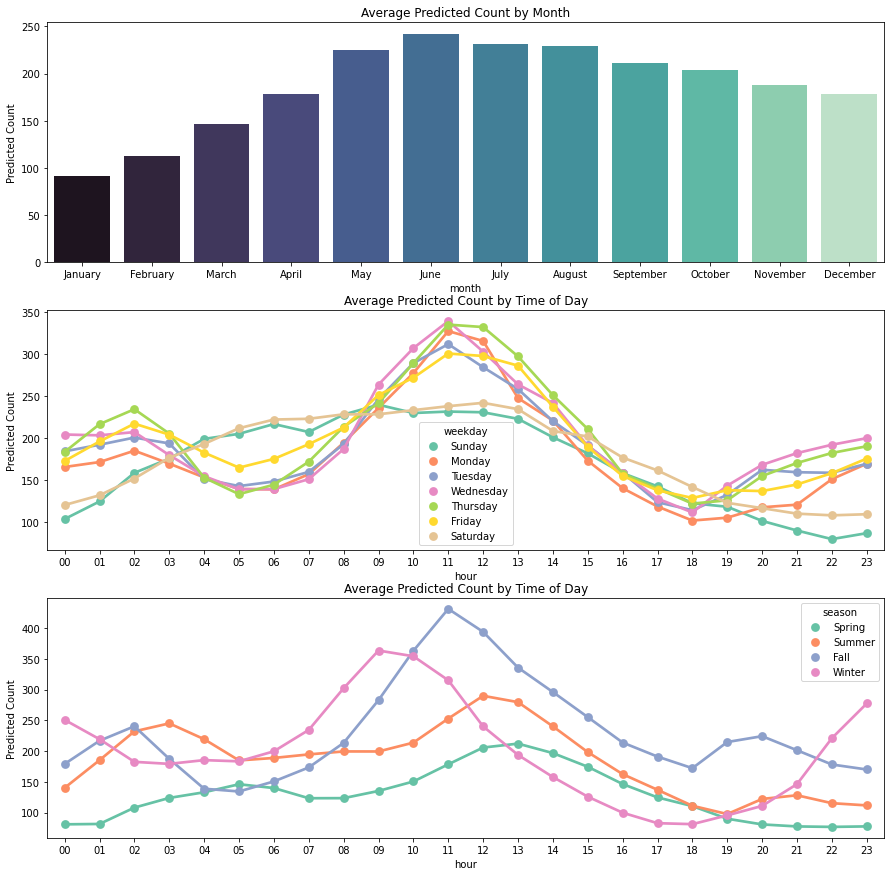

<Figure size 1080x576 with 0 Axes>

In [78]:
fig,ax = plt.subplots(3, figsize=(15,15))

sort_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
data = knn_data.groupby('month')['Predicted Count'].mean().reset_index()
sns.barplot(data=data , x='month' , y='Predicted Count', ax=ax[0] , order=sort_order , palette='mako')
ax[0].set_title('Average Predicted Count by Month')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
data = knn_data.groupby(['hour' , 'weekday'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[1] , hue='weekday' , hue_order=hue_order , join=True , palette='Set2')
ax[1].set_title('Average Predicted Count by Time of Day')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(15,8))
data = knn_data.groupby(['hour' , 'season'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[2] , hue='season' , hue_order=['Spring' , 'Summer' , 'Fall' , 'Winter'] , join=True , palette='Set2')
ax[2].set_title('Average Predicted Count by Time of Day')


plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">New Data - Decision Tree Regression Prediction</h3>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>Rental distribuation is normal</li>
        <li>Model didn't predicted negative values which is a good sign!</li>
        <li>Average rental count across time of day per weekday and season and across month closely resemble actual data</li>
    </ul>
</div>

In [79]:
y_data_pred = dt_regressor.predict(x_data_test)
predicted = pd.DataFrame(y_data_pred.reshape(-1,1) , columns=['Predicted Count'])
dt_data = pd.concat([data_test , predicted] , axis=1)
dt_data.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Predicted Count
3600,2012-02-23 19:00:00,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,20.5,24.24,39,6.0032,2012-02-23,19,Thursday,February,232.0


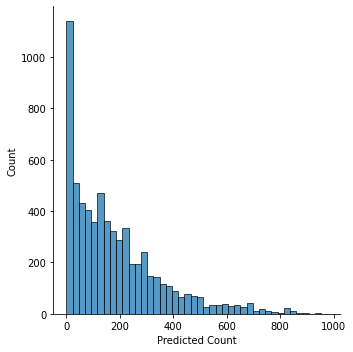

In [80]:
sns.displot(data=dt_data , x='Predicted Count')

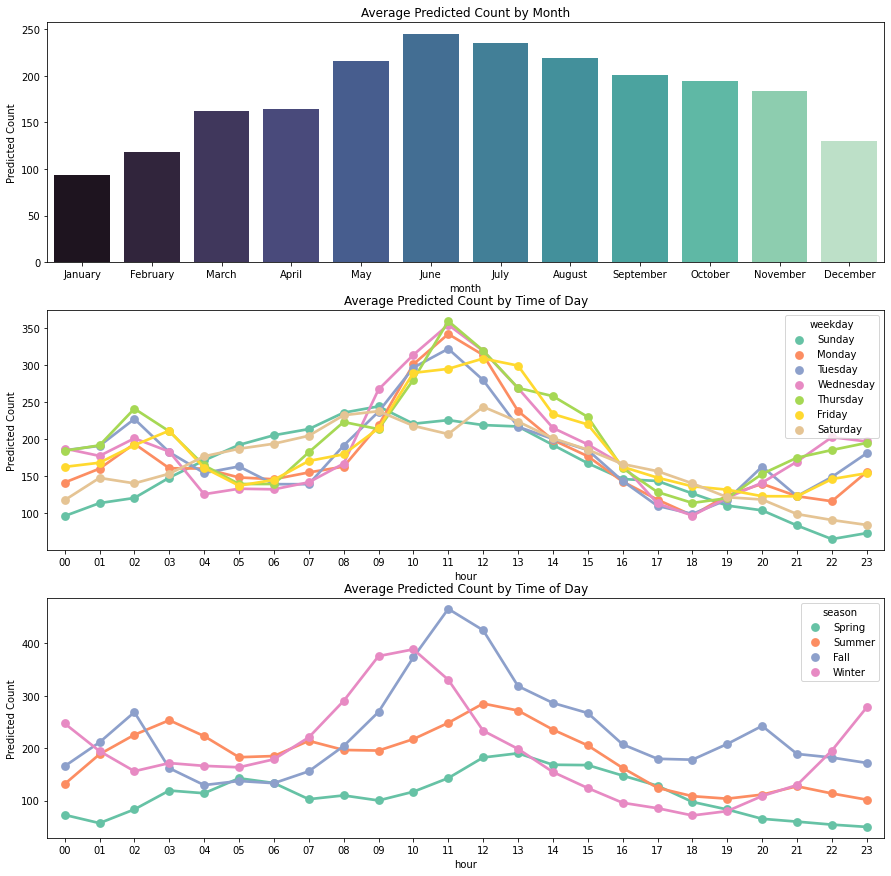

<Figure size 1080x576 with 0 Axes>

In [81]:
fig,ax = plt.subplots(3, figsize=(15,15))

sort_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
data = dt_data.groupby('month')['Predicted Count'].mean().reset_index()
sns.barplot(data=data , x='month' , y='Predicted Count', ax=ax[0] , order=sort_order , palette='mako')
ax[0].set_title('Average Predicted Count by Month')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
data = dt_data.groupby(['hour' , 'weekday'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[1] , hue='weekday' , hue_order=hue_order , join=True , palette='Set2')
ax[1].set_title('Average Predicted Count by Time of Day')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(15,8))
data = dt_data.groupby(['hour' , 'season'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[2] , hue='season' , hue_order=['Spring' , 'Summer' , 'Fall' , 'Winter'] , join=True , palette='Set2')
ax[2].set_title('Average Predicted Count by Time of Day')


plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">New Data - Random Forest Regression Prediction</h3>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>Rental distribuation is normal</li>
        <li>Model didn't predicted negative values which is a good sign!</li>
        <li>Average rental count across time of day per weekday and season and across month closely resemble actual data</li>
    </ul>
</div>

In [82]:
y_data_pred = rf_regressor.predict(x_data_test)
predicted = pd.DataFrame(y_data_pred.reshape(-1,1) , columns=['Predicted Count'])
rf_data = pd.concat([data_test , predicted] , axis=1)
rf_data.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Predicted Count
2741,2011-11-22 18:00:00,Winter,0,1,"Light Snow, Light Rain + Thunderstorm + Scatt...",18.04,21.97,100,0.0,2011-11-22,18,Tuesday,November,3.896667


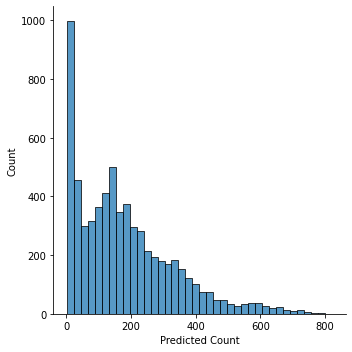

In [83]:
sns.displot(data=rf_data , x='Predicted Count')

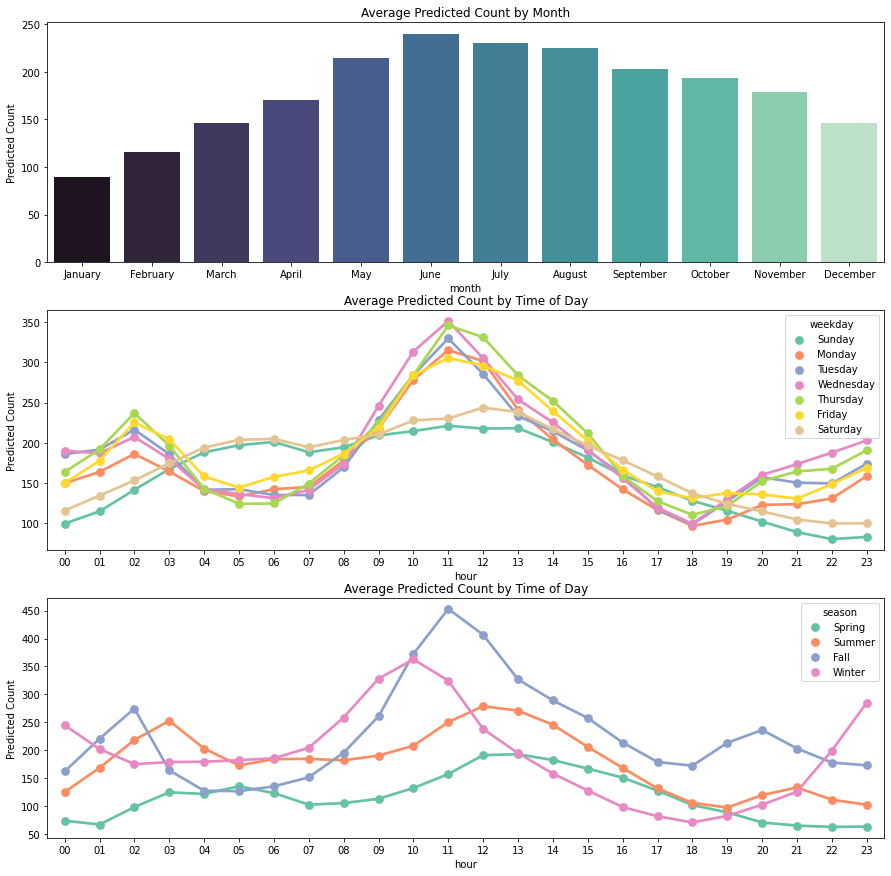

<Figure size 1080x576 with 0 Axes>

In [84]:
fig,ax = plt.subplots(3, figsize=(15,15))

sort_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
data = rf_data.groupby('month')['Predicted Count'].mean().reset_index()
sns.barplot(data=data , x='month' , y='Predicted Count', ax=ax[0] , order=sort_order , palette='mako')
ax[0].set_title('Average Predicted Count by Month')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
data = rf_data.groupby(['hour' , 'weekday'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[1] , hue='weekday' , hue_order=hue_order , join=True , palette='Set2')
ax[1].set_title('Average Predicted Count by Time of Day')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(15,8))
data = rf_data.groupby(['hour' , 'season'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[2] , hue='season' , hue_order=['Spring' , 'Summer' , 'Fall' , 'Winter'] , join=True , palette='Set2')
ax[2].set_title('Average Predicted Count by Time of Day')


plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">New Data - XGBoost Regression Prediction</h3>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>Rental distribuation is normal</li>
        <li>Model didn't predicted negative values which is a good sign!</li>
        <li>Average rental count across time of day per weekday and season and across month closely resemble actual data</li>
    </ul>
</div>

In [85]:
y_data_pred = xgb_reg.predict(x_data_test)
predicted = pd.DataFrame(y_data_pred.reshape(-1,1) , columns=['Predicted Count'])
xgb_data = pd.concat([data_test , predicted] , axis=1)
xgb_data.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Predicted Count
4676,2012-06-23 16:00:00,Fall,0,0,Clear + Few clouds + Partly cloudy + Partly c...,34.44,35.605,26,19.9995,2012-06-23,16,Saturday,June,129.145325


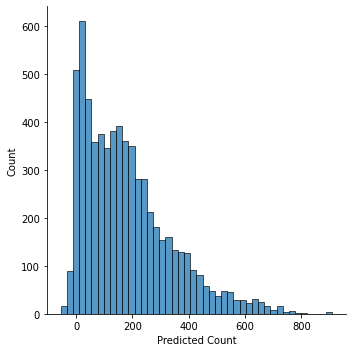

In [86]:
sns.displot(data=xgb_data , x='Predicted Count')

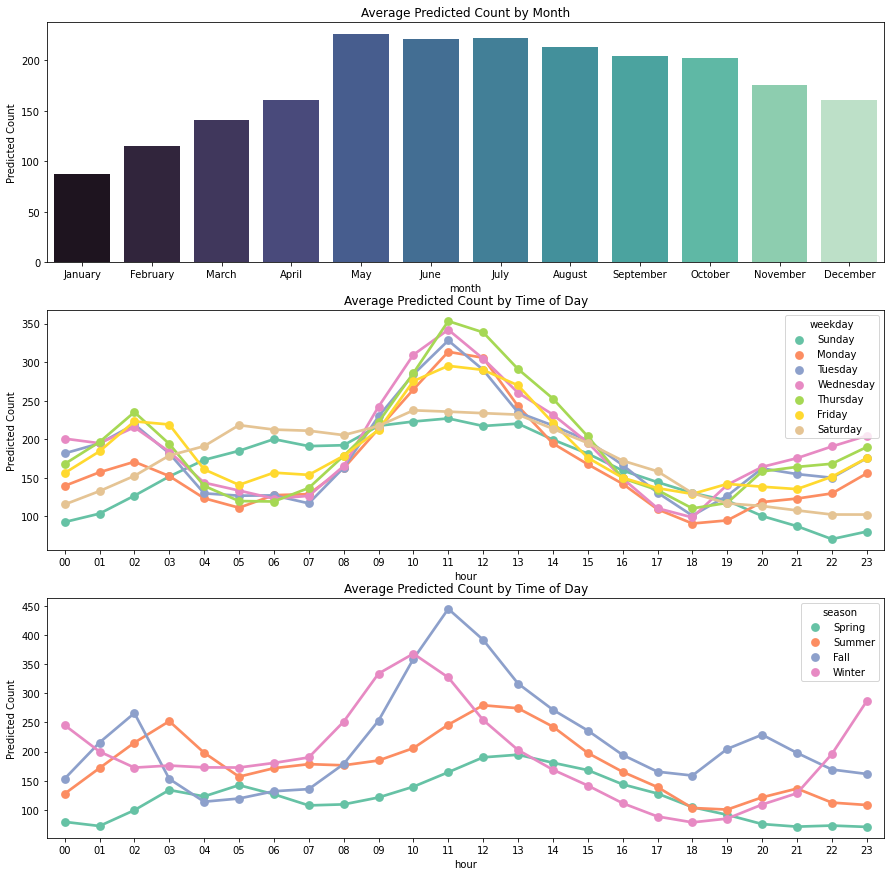

<Figure size 1080x576 with 0 Axes>

In [87]:
fig,ax = plt.subplots(3, figsize=(15,15))

sort_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
data = xgb_data.groupby('month')['Predicted Count'].mean().reset_index()
sns.barplot(data=data , x='month' , y='Predicted Count', ax=ax[0] , order=sort_order , palette='mako')
ax[0].set_title('Average Predicted Count by Month')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
data = xgb_data.groupby(['hour' , 'weekday'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[1] , hue='weekday' , hue_order=hue_order , join=True , palette='Set2')
ax[1].set_title('Average Predicted Count by Time of Day')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(15,8))
data = xgb_data.groupby(['hour' , 'season'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[2] , hue='season' , hue_order=['Spring' , 'Summer' , 'Fall' , 'Winter'] , join=True , palette='Set2')
ax[2].set_title('Average Predicted Count by Time of Day')


plt.show()

<div class="alert alert-block alert-danger">
    <h3 align="center">New Data - Support Vector Regression Prediction</h3>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>Rental distribuation isn't normal and has an even distribuation</li>
        <li>Model didn't predicted many negative values which is a good sign!</li>
        <li>Average rental count across time of day per weekday and season and across month isn't normal</li>
    </ul>
</div>

In [88]:
y_data_pred = svr_reg.predict(x_data_test)
predicted = pd.DataFrame(y_data_pred.reshape(-1,1) , columns=['Predicted Count'])
svr_data = pd.concat([data_test , predicted] , axis=1)
svr_data.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Predicted Count
5418,2012-08-31 14:00:00,Fall,0,1,Clear + Few clouds + Partly cloudy + Partly c...,36.9,38.635,25,15.0013,2012-08-31,14,Friday,August,271.632014


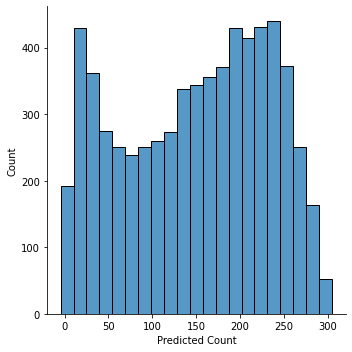

In [89]:
sns.displot(data=svr_data , x='Predicted Count')

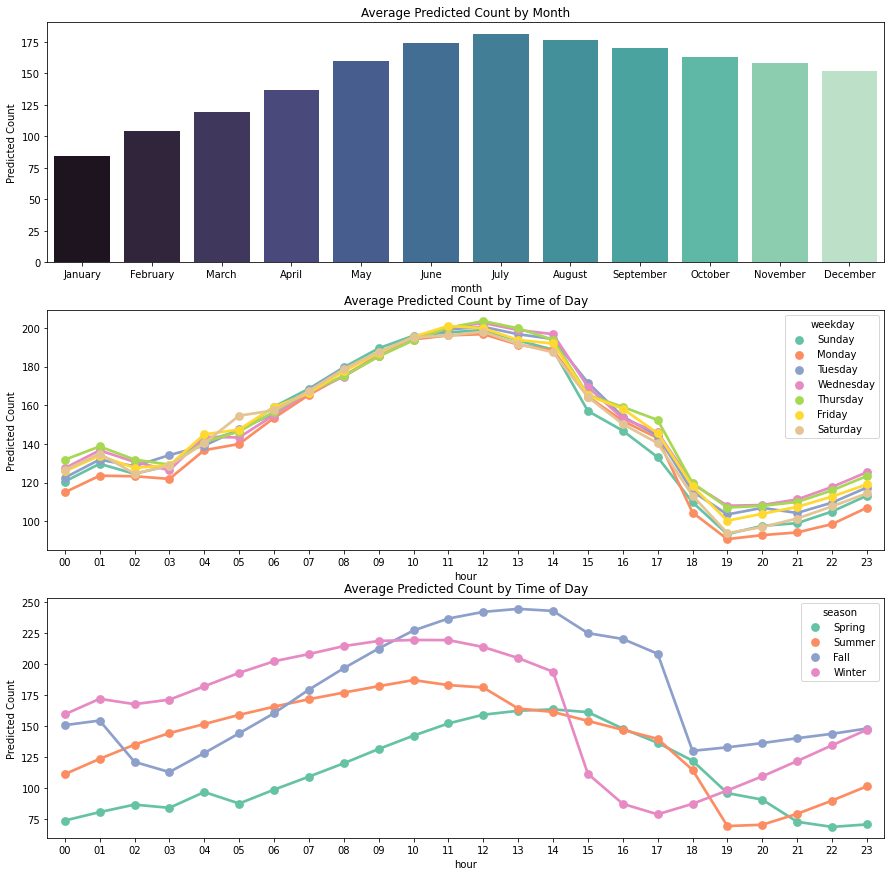

<Figure size 1080x576 with 0 Axes>

In [90]:
fig,ax = plt.subplots(3, figsize=(15,15))

sort_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
data = svr_data.groupby('month')['Predicted Count'].mean().reset_index()
sns.barplot(data=data , x='month' , y='Predicted Count', ax=ax[0] , order=sort_order , palette='mako')
ax[0].set_title('Average Predicted Count by Month')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
data = svr_data.groupby(['hour' , 'weekday'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[1] , hue='weekday' , hue_order=hue_order , join=True , palette='Set2')
ax[1].set_title('Average Predicted Count by Time of Day')

hue_order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.figure(figsize=(15,8))
data = svr_data.groupby(['hour' , 'season'])['Predicted Count'].mean().reset_index()
sns.pointplot(data=data , x='hour' , y='Predicted Count' , ax=ax[2] , hue='season' , hue_order=['Spring' , 'Summer' , 'Fall' , 'Winter'] , join=True , palette='Set2')
ax[2].set_title('Average Predicted Count by Time of Day')


plt.show()

<div class="alert alert-block alert-info">
    <h2 align="center">PyCaret</h2>
</div>

<div class="alert alert-block alert-warning">
    <ul>
        <li>Loading data for PyCaret</li>
        <li>Preparing Data</li>
    </ul>
</div>

In [100]:
# For google colab
url = 'https://raw.githubusercontent.com/BKV15/AI_Utech/main/Machine%20Learning/Exercise_4/train.csv'

# For local jupyter notebook
path = 'train.csv'

data_train_pycaret = pd.read_csv(url)
data_train_pycaret.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5441,2012-01-01 19:00:00,1,0,0,3,17.22,21.21,67,26.0027,20,85,105


In [101]:
data_train_pycaret["date"] = data_train_pycaret.datetime.apply(lambda x : x.split()[0])
data_train_pycaret["hour"] = data_train_pycaret.datetime.apply(lambda x : x.split()[1].split(":")[0])
data_train_pycaret["weekday"] = data_train_pycaret.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
data_train_pycaret["month"] = data_train_pycaret.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

data_train_pycaret["season"] = data_train_pycaret.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
data_train_pycaret["weather"] = data_train_pycaret.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
data_train_pycaret = data_train_pycaret.drop(['datetime' , 'date' , 'casual' , 'registered'] , axis=1)

data_train_pycaret.sample()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,weekday,month
10030,Winter,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + F...",13.12,15.15,49,16.9979,59,07,Saturday,November


In [102]:
setup(data=data_train_pycaret , target='count' , session_id=123)

,Description,Value
0,session_id,123
1,Target,count
2,Original Data,"(10886, 12)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 33)"


(-1,
 [],
 Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 'lightgbm',
 False,
 'box-cox',
 False,
 'lightgbm',
 {'mae': <pycaret.containers.metrics.regression.MAEMetricContainer at 0x7f6fae1aeed0>,
  'mape': <pycaret.containers.metrics.regression.MAPEMetricContainer at 0x7f6fae1b3e50>,
  'mse': <pycaret.containers.metrics.regression.MSEMetricContainer at 0x7f6fae1aee50>,
  'r2': <pycaret.containers.metrics.regression.R2MetricContainer at 0x7f6fae1aefd0>,
  'rmse': <pycaret.containers.metrics.regression.RMSEMetricContainer at 0x7f6fae1aef90>,
  'rmsle': <pycaret.containers.metrics.regression.RMSLEMetricContainer at 0x7f6fae1aee10>},
            temp      atemp  ...  month_October  month_September
 4046  24.600000  30.305000  ...            0.0              1.0
 9262  22.139999  25.760000  ...            0.0              1.0
 6409  12.300000  13.635000  ...            0.0              0.0
 6075   8.200000   9.850000  ...            0.0              0.0
 672

In [103]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,4.416170e+01,4.239703e+03,6.503640e+01,8.711000e-01,0.4684,5.311000e-01,0.146
et,Extra Trees Regressor,4.464330e+01,4.720960e+03,6.860290e+01,8.565000e-01,0.4166,4.283000e-01,2.710
rf,Random Forest Regressor,4.559430e+01,4.792346e+03,6.914690e+01,8.542000e-01,0.4197,4.271000e-01,3.046
gbr,Gradient Boosting Regressor,5.655290e+01,6.727160e+03,8.195860e+01,7.954000e-01,0.6513,8.959000e-01,0.696
dt,Decision Tree Regressor,6.010110e+01,9.444586e+03,9.705150e+01,7.125000e-01,0.5514,5.225000e-01,0.063
ada,AdaBoost Regressor,9.338270e+01,1.385842e+04,1.176490e+02,5.783000e-01,1.0320,2.434000e+00,0.463
knn,K Neighbors Regressor,8.550000e+01,1.556002e+04,1.245931e+02,5.278000e-01,0.8857,1.703100e+00,0.085
ridge,Ridge Regression,1.081241e+02,2.126597e+04,1.457380e+02,3.542000e-01,1.2247,3.364300e+00,0.019
br,Bayesian Ridge,1.080669e+02,2.126703e+04,1.457403e+02,3.542000e-01,1.2201,3.352800e+00,0.028
lr,Linear Regression,1.081254e+02,2.126614e+04,1.457386e+02,3.542000e-01,1.2247,3.364500e+00,0.330


<div class="alert alert-block alert-info">
    <h3 align="center">Top 3 Models in PyCaret</h3>
</div>

<div class="alert alert-block alert-danger">
    <h3 align="center">Light Gradient Boosting Machine</h3>
</div>

In [104]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,49.9879,5291.7312,72.7443,0.8531,0.4905,0.5425
1,44.0143,4184.5727,64.6883,0.8790,0.4684,0.5377
2,43.8473,4241.6006,65.1276,0.8634,0.4809,0.5387
3,44.3123,4500.5340,67.0860,0.8590,0.4552,0.5114
4,41.2295,3696.4882,60.7988,0.8781,0.4392,0.5132
5,42.1265,3778.8324,61.4722,0.8913,0.4769,0.5664
6,42.9786,3938.1376,62.7546,0.8840,0.4836,0.5108
7,44.2783,4267.8990,65.3292,0.8610,0.4828,0.5639
8,45.1347,4249.9006,65.1913,0.8710,0.4269,0.4463
9,43.7077,4247.3302,65.1715,0.8708,0.4797,0.5803


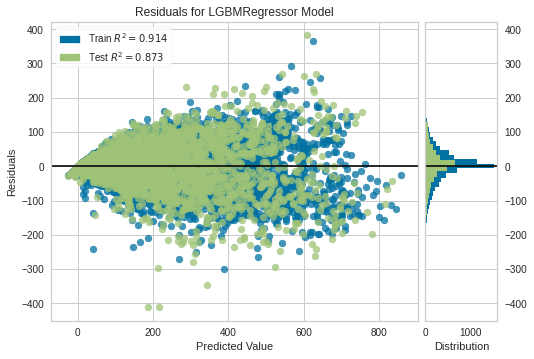

In [105]:
plot_model(lightgbm)

In [107]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [108]:
predict_model(lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,43.9712,4126.2485,64.2359,0.873,0.4732,0.5506


,temp,atemp,humidity,windspeed,hour,season_Fall,season_Spring,season_Summer,season_Winter,holiday_1,workingday_1,weather_ Clear + Few clouds + Partly cloudy + Partly cloudy,weather_ Light Snow Light Rain + Thunderstorm + Scattered clouds Light Rain + Scattered clouds,weather_ Mist + Cloudy Mist + Broken clouds Mist + Few clouds Mist,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,count,Label
0,18.040001,21.969999,62.0,16.997900,21.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,188,170.167626
1,13.120000,15.150000,61.0,16.997900,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.176280
2,12.300000,14.395000,52.0,16.997900,10.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89,163.490326
3,18.860001,22.725000,88.0,8.998100,23.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,87.847906
4,33.619999,37.119999,43.0,19.999500,14.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150,204.086211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,22.139999,25.760000,83.0,26.002701,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67,75.603547
3262,18.860001,22.725000,88.0,19.999500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,55.882474
3263,26.240000,30.305000,65.0,16.997900,11.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,647,431.047445
3264,13.120000,16.665001,76.0,6.003200,12.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,109.868497


<div class="alert alert-block alert-danger">
    <h3 align="center">Extra Tree Regressor</h3>
</div>

In [109]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,49.8113,5860.4752,76.5537,0.8373,0.4070,0.3995
1,45.1373,4629.9536,68.0438,0.8661,0.4194,0.4507
2,43.6989,4646.0854,68.1622,0.8504,0.4291,0.4467
3,45.6251,5006.7560,70.7584,0.8432,0.4237,0.4413
4,42.4181,4201.1133,64.8160,0.8614,0.4230,0.4396
5,41.9870,4416.6722,66.4580,0.8730,0.3922,0.3923
6,42.5051,4068.8812,63.7878,0.8802,0.4073,0.4059
7,43.8307,4358.7824,66.0211,0.8581,0.4205,0.4318
8,47.5281,5457.7436,73.8765,0.8343,0.4024,0.3956
9,43.8915,4563.1388,67.5510,0.8612,0.4416,0.4798


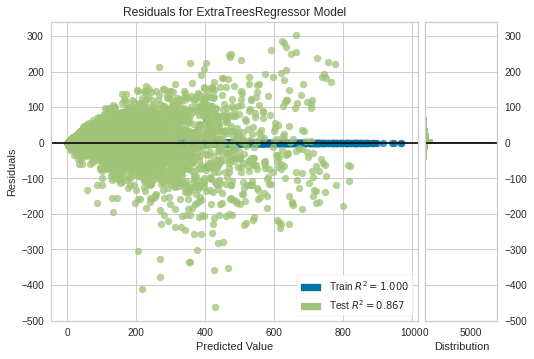

In [110]:
plot_model(et)

In [111]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [112]:
predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,42.9392,4309.6575,65.648,0.8673,0.4186,0.4493


,temp,atemp,humidity,windspeed,hour,season_Fall,season_Spring,season_Summer,season_Winter,holiday_1,workingday_1,weather_ Clear + Few clouds + Partly cloudy + Partly cloudy,weather_ Light Snow Light Rain + Thunderstorm + Scattered clouds Light Rain + Scattered clouds,weather_ Mist + Cloudy Mist + Broken clouds Mist + Few clouds Mist,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,count,Label
0,18.040001,21.969999,62.0,16.997900,21.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,188,172.08
1,13.120000,15.150000,61.0,16.997900,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3.55
2,12.300000,14.395000,52.0,16.997900,10.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89,150.19
3,18.860001,22.725000,88.0,8.998100,23.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,68.63
4,33.619999,37.119999,43.0,19.999500,14.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150,185.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,22.139999,25.760000,83.0,26.002701,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67,101.95
3262,18.860001,22.725000,88.0,19.999500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,49.51
3263,26.240000,30.305000,65.0,16.997900,11.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,647,389.10
3264,13.120000,16.665001,76.0,6.003200,12.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,57.15


<div class="alert alert-block alert-danger">
    <h3 align="center">Random Forest Regressor</h3>
</div>

In [113]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,50.4711,5795.9765,76.1313,0.8391,0.4114,0.4060
1,47.5506,5078.1038,71.2608,0.8532,0.4379,0.4796
2,45.5583,4955.6698,70.3965,0.8404,0.4254,0.4433
3,45.2212,4836.9351,69.5481,0.8485,0.4297,0.4415
4,42.8224,4217.7859,64.9445,0.8609,0.4090,0.4091
5,43.3786,4523.3173,67.2556,0.8699,0.4048,0.3929
6,43.2489,4044.8237,63.5989,0.8809,0.4104,0.4042
7,46.0941,4920.0458,70.1430,0.8398,0.4305,0.4356
8,46.9903,4930.3763,70.2166,0.8504,0.3943,0.3797
9,44.6074,4620.4276,67.9737,0.8595,0.4433,0.4792


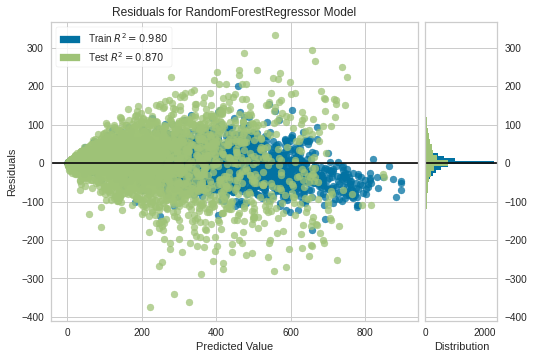

In [114]:
plot_model(rf)

In [115]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [116]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,43.4178,4220.8587,64.9681,0.8701,0.4181,0.4606


,temp,atemp,humidity,windspeed,hour,season_Fall,season_Spring,season_Summer,season_Winter,holiday_1,workingday_1,weather_ Clear + Few clouds + Partly cloudy + Partly cloudy,weather_ Light Snow Light Rain + Thunderstorm + Scattered clouds Light Rain + Scattered clouds,weather_ Mist + Cloudy Mist + Broken clouds Mist + Few clouds Mist,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,count,Label
0,18.040001,21.969999,62.0,16.997900,21.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,188,142.32
1,13.120000,15.150000,61.0,16.997900,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2.94
2,12.300000,14.395000,52.0,16.997900,10.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89,167.55
3,18.860001,22.725000,88.0,8.998100,23.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,73.10
4,33.619999,37.119999,43.0,19.999500,14.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150,169.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,22.139999,25.760000,83.0,26.002701,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67,113.46
3262,18.860001,22.725000,88.0,19.999500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,66.24
3263,26.240000,30.305000,65.0,16.997900,11.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,647,359.32
3264,13.120000,16.665001,76.0,6.003200,12.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,70.60
